<a href="https://colab.research.google.com/github/saai07/Autoencoder/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#auto encoder

In [3]:
#imports
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,_) , (x_test,_) = mnist.load_data()

In [5]:
#normalizing input
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
input_img = keras.Input(shape = (784,))
encoded = layers.Dense(128 , activation = "relu")((input_img))
encoded = layers.Dense(64, activation = "relu")(encoded)
encoded = layers.Dense(32, activation = "relu")(encoded)
decoded = layers.Dense(64 , activation = "relu")(encoded)
decoded = layers.Dense(128 , activation=  "relu")(decoded)
decoded = layers.Dense(784 , activation = "sigmoid")(decoded)

In [9]:
autoencoder = keras.Model(input_img , decoded , name= "the-autoencoder")
autoencoder.compile(optimizer="adam", loss ="binary_crossentropy")

In [33]:
autoencoder.fit(x_train , x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True,
                validation_data=(x_test , x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.3481 - val_loss: 0.1687
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1607 - val_loss: 0.1381
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1357 - val_loss: 0.1240
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.1234 - val_loss: 0.1165
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.1170 - val_loss: 0.1126
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1134 - val_loss: 0.1094
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.1102 - val_loss: 0.1066
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.1071 - val_loss: 0.1035
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1042 - val_loss: 0.1015
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1023 - val_loss: 0.1000


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


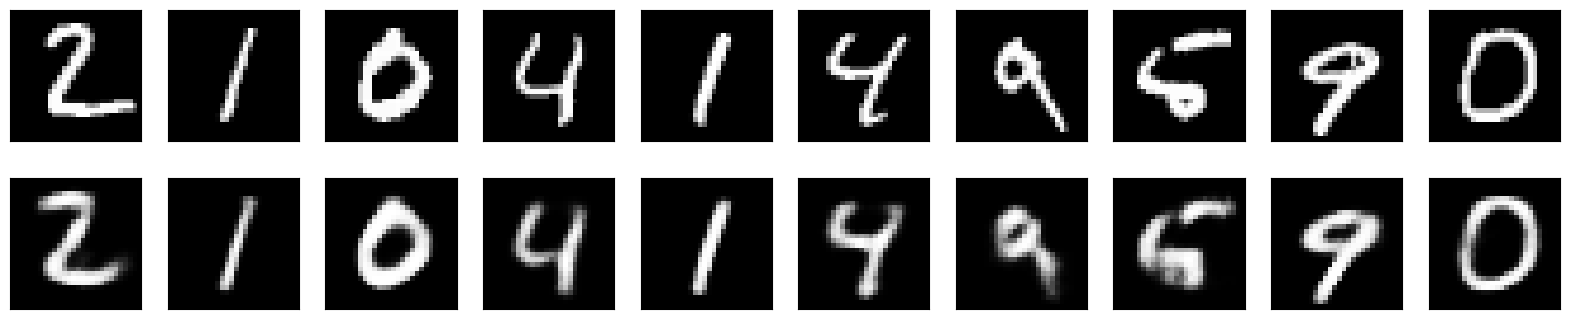

In [41]:
#displaying
decoded_img = autoencoder.predict(x_test)
n = 10
plt.figure(figsize = (20,4))
for i in range(1, n+1):
  #display original
  ax= plt.subplot(2,n,i)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstrust
  ax= plt.subplot(2,n,i +n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()



In [10]:
autoencoder.fit(x_train , x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True,
                validation_data=(x_test , x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3372 - val_loss: 0.1678
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1606 - val_loss: 0.1405
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1367 - val_loss: 0.1255
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1244 - val_loss: 0.1179
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1176 - val_loss: 0.1128
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1135 - val_loss: 0.1100
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1106 - val_loss: 0.1078
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1084 - val_loss: 0.1052
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1060 - val_loss: 0.1033
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1039 - val_loss: 0.1012


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


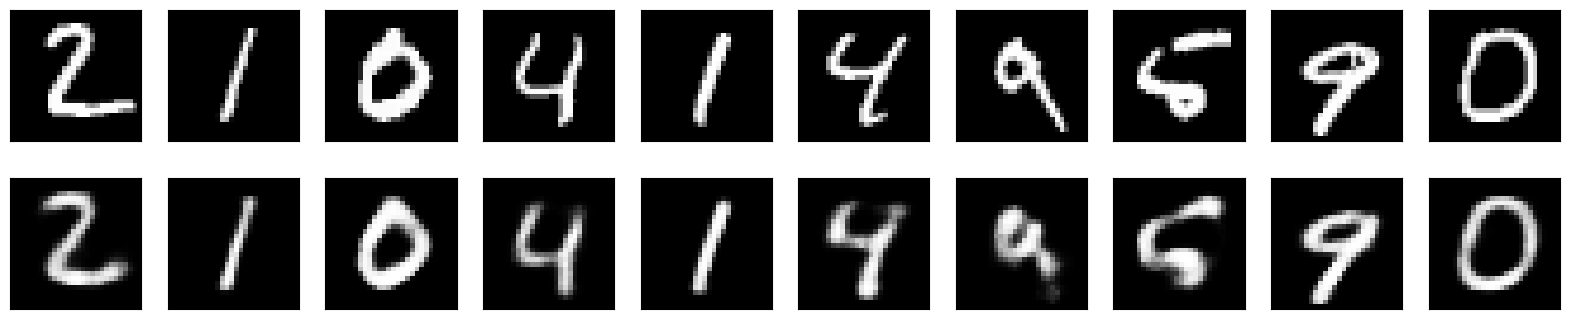

In [11]:
decoded_img = autoencoder.predict(x_test)
n = 10
plt.figure(figsize = (20,4))
for i in range(1, n+1):
  #display original
  ax= plt.subplot(2,n,i)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Display reconstrust
  ax= plt.subplot(2,n,i +n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()